# Minimal working example to convert vtk files to a single bts (TurbSim) file.

In [21]:
# Load vtk tools
import sys, os, glob
codePath = os.path.abspath(os.path.join(os.curdir,'..','python'))
if codePath not in sys.path:
    sys.path.append(codePath)
import vtkTools as vtk  
import stochasticTurbulenceTools as stt
import matplotlib.pyplot as plt

In [22]:
# Define all the paths
curPath  = os.path.abspath(os.curdir)
dataPath = os.path.join(curPath,'..','data')
vtkPath  = os.path.join(dataPath,'vtk')
exePath  = glob.glob(os.path.join(curPath,'..','fortran','of2fast'))[0]

In [23]:
reload(vtk)

<module 'vtkTools' from '/Users/pdoubraw/Documents/Repos/ABLTools/python/vtkTools.py'>

In [24]:
# Convert the example vtk files to a bts file
vtk.vtk2bts(vtkPath, t0=10200, dt=0.125, nt=5, exePath=exePath)

In [25]:
# Read in the original vtks
[x,y,z,u,v,w] = vtk.read_vtkStructuredMany(vtkPath)

Opening /Users/pdoubraw/Documents/Repos/ABLTools/data/vtk/tsConv.inp


In [26]:
# Read in the new bts
btsData = stt.stochasticTurbulence(prefix='test')
btsData.readBTS(vtkPath)

Trying to find /Users/pdoubraw/Documents/Repos/ABLTools/examples/../data/vtk/test.bts...
Opening file /Users/pdoubraw/Documents/Repos/ABLTools/examples/../data/vtk/test.bts...


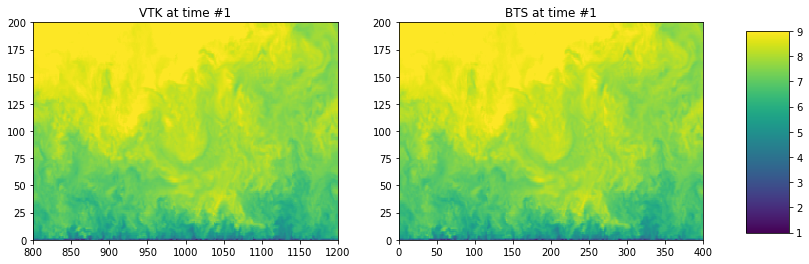

In [27]:
# visually compare both for time step t
t = 1

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
im1 = ax1.pcolor(y[t,0,:,:],z[t,0,:,:],u[t,0,:,:],vmin=1,vmax=9)
ax1.set_title("VTK at time #{0}".format(t))
ax2 = fig.add_subplot(122)
im2 = ax2.pcolor(btsData.Y,btsData.Z,btsData.u[t,:,:].T,vmin=1,vmax=9)
ax2.set_title("BTS at time #{0}".format(t))
cax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(im2, cax=cax)
plt.show()